In [1]:
# On importe les librairies dont on aura besoin pour ce tp
import pandas as pd
from matplotlib import pyplot as plt, cm as cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Référence en y du plot
_ORDONNEE = "nutrition-score-fr_100g"

# Lieu où se trouve le FICHIER
_FICHIER = 'C:\\Users\\Toni\\Desktop\\pas_synchro\\bdd_clean_v1.csv'

Fonction qui permet d'afficher un graphique où l'on verra l'importance relative de chaque élément dans le calcul final

In [3]:
def definir_importance(data):

    # Log
    print("Fct definir_importance : \n")

    # Trouver le numéro de colonne qui nous sert d'ordonné dans l'affichage
    position_ordonne = data.columns.get_loc(_ORDONNEE)

    # Isolate Data, class labels and column values
    #X = data.iloc[:,0:15]       # colonne 0 à 15
    xdata = data.iloc[:, 0:position_ordonne]    # toutes les colonnes sauf la dernière
    ydata = data.iloc[:, position_ordonne]      # dernière colonne

    # names = data.columns.values[0:15]                 # avec limite
    names = data.columns.values[0:position_ordonne]     # sans limite

    # Build the model
    rfc = RandomForestClassifier(n_estimators=100, criterion='gini', verbose=1)

    # Fit the model
    rfc.fit(xdata, ydata)

    # Print the results
    #print("Features sorted by their score:")
    #print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse = True))

    # Isolate feature importances
    importance = rfc.feature_importances_

    # Sort the feature importances
    sorted_importances = np.argsort(importance)

    # Insert padding
    padding = np.arange(len(names)) + 0.5

    # Customize the plot
    plt.yticks(padding, names[sorted_importances])
    plt.xlabel("Relative Importance")
    plt.title("Variable Importance")

    # Plot the data
    plt.barh(padding, importance[sorted_importances], align='center')

    # Show the plot
    plt.show()

Fonction qui permet de créer une visualisation du lien entre les variables 2 à 2

In [4]:
def correlation_matrix(data):

    # Calcul de la matrice
    corr = data.corr()
    cmap = cm.get_cmap('jet', 30)

    # Taille de la figure
    plt.figure(figsize=(10, 10))
    # Création du type d'image
    cax = plt.imshow(data.corr(), interpolation="nearest", cmap=cmap)
    plt.grid(True)

    # Libellés sur les axes
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    plt.colorbar(cax, ticks=[-0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    plt.show()

On entre dans le main

In [5]:
# On charge le dataset sur les colonnes qui nous ont intéressés dans la fonction du dessus
data = pd.read_csv(_FICHIER,
                   error_bad_lines=False,
                   engine='python',
                   sep=',')

# On supprime une colonne inutile
del data['Unnamed: 0']

Fct definir_importance : 



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.7s finished


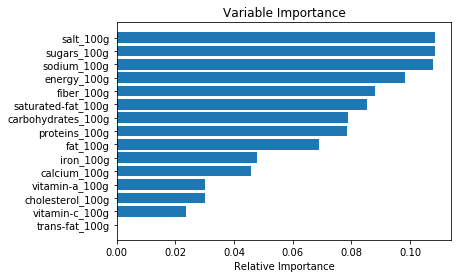

In [6]:
# Création de la matrice d'importance
definir_importance(data)

Ce diagramme permet de voir directement quels sont les variables qui sont les plus importantes dans le calcul final du score nutritionnel. Dans l’ordre, les 5 variables *plus importantes* sont :

* La quantité de sucre
* La quantité de sel
* La quantité de sodium
* La quantité d’énergie
* La quantité de fibres

Autrement dit, plus il y a de sucres (ou de sel, ou de sodium, etc…) plus la qualité du produit va être impactée. 

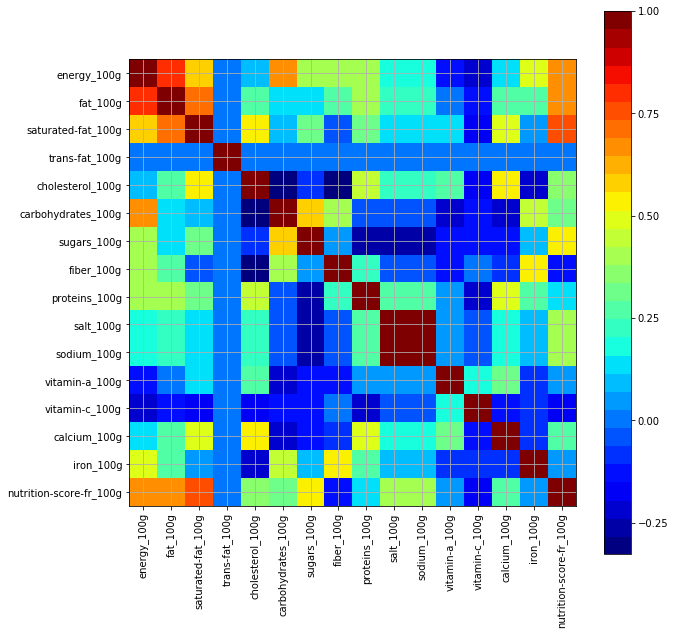

In [7]:
# Création du collérogramme
correlation_matrix(data)

Dans le corrélogramme, il ne faut pas prendre en compte la diagonale (supérieure gauche-inférieure droite) car elle « montre l’impact d’une variable sur elle-même ». Sa valeur sera toujours de 1.

Les conclusions essentielles à tirer de cette figure sont les suivantes :

__Sont très liées :__
* Les quantités d’énergie et de graisse.
* Les quantités de graisse et de graisses saturées.
* Les quantités de carbohydrates et d’énergie.

__Vont faire progresser positivement le score nutritionnel :__
* La quantité de vitamine A.
* La quantité de vitamine C.
* La quantité de fibres
* La quantité de protéines.

__Vont faire progresser négativement le score nutritionnel :__
* La quantité d’énergie
* La quantité de graisse.
* La quantité de sucre.
* La quantité de graisse saturée.